In [1]:
# Importing necessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

# Importing libraries necessary for Model Building and Training
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
data = pd.read_csv('/content/emails.csv')
data.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
data.shape


(692, 3002)

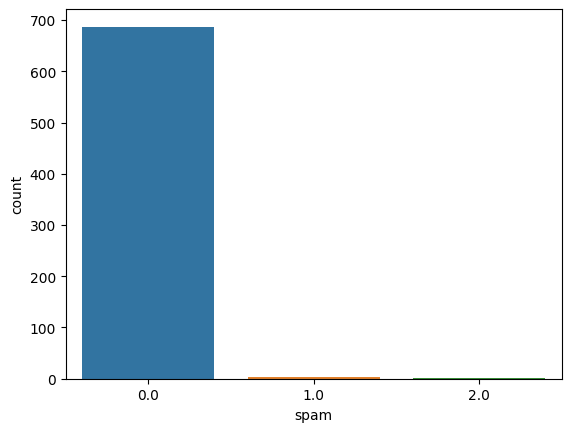

In [4]:
sns.countplot(x='spam', data=data)
plt.show()


Text(0.5, 0, 'Message types')

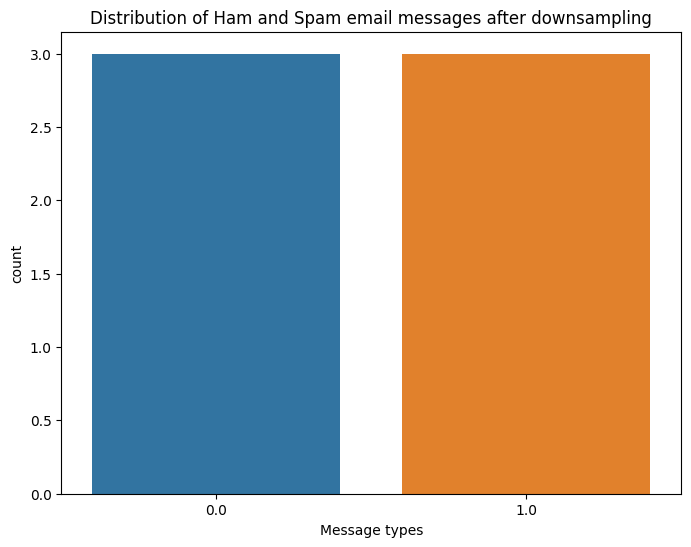

In [5]:
# Downsampling to balance the dataset
ham_msg = data[data.spam == 0]
spam_msg = data[data.spam == 1]
ham_msg = ham_msg.sample(n=len(spam_msg),
						random_state=42)

# Plotting the counts of down sampled dataset
balanced_data = ham_msg.append(spam_msg)\
	.reset_index(drop=True)
plt.figure(figsize=(8, 6))
sns.countplot(data = balanced_data, x='spam')
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types')


In [7]:
# Ensure the 'text' column contains string values
balanced_data['text'] = balanced_data['text'].astype(str)

# Replace 'Subject' with an empty string in the 'text' column
balanced_data['text'] = balanced_data['text'].str.replace('Subject', '')



In [8]:
punctuations_list = string.punctuation
def remove_punctuations(text):
	temp = str.maketrans('', '', punctuations_list)
	return text.translate(temp)

balanced_data['text']= balanced_data['text'].apply(lambda x: remove_punctuations(x))
balanced_data.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 288,4,2,3,0,4,0,26,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 658,34,31,6,19,17,26,250,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
2,Email 259,4,4,1,0,1,1,16,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 150,5,11,1,2,2,5,49,11,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Email 392,8,14,3,7,4,6,291,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,1.0


In [9]:
def remove_stopwords(text):
	stop_words = stopwords.words('english')

	imp_words = []

	# Storing the important words
	for word in str(text).split():
		word = word.lower()

		if word not in stop_words:
			imp_words.append(word)

	output = " ".join(imp_words)

	return output


balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 288,4,2,3,0,4,0,26,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 658,34,31,6,19,17,26,250,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
2,Email 259,4,4,1,0,1,1,16,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 150,5,11,1,2,2,5,49,11,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Email 392,8,14,3,7,4,6,291,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,1.0


In [31]:
pip install wordcloud

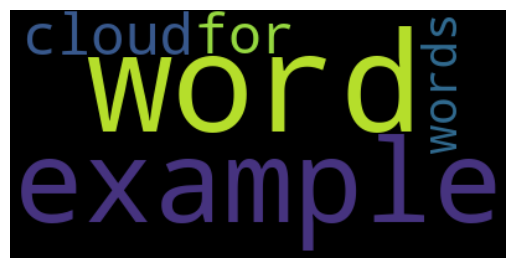

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have a dictionary of word frequencies in `counts`
# Example dictionary format: {"word1": frequency1, "word2": frequency2, ...}
counts = {"example": 100, "words": 50, "for": 75, "word": 120, "cloud": 80}

if counts:
    wordcloud = WordCloud().generate_from_frequencies(counts)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("No word frequencies found to generate a word cloud.")



In [37]:
#train test split
train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['text'],
													balanced_data['spam'],
													test_size = 0.2,
													random_state = 42)


In [38]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

# Pad sequences to have the same length
max_len = 100 # maximum sequence length
train_sequences = pad_sequences(train_sequences,
								maxlen=max_len,
								padding='post',
								truncating='post')
test_sequences = pad_sequences(test_sequences,
							maxlen=max_len,
							padding='post',
							truncating='post')


In [49]:
# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
									output_dim=64,
									input_length=max_len))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 64)           192       
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 37441 (146.25 KB)
Trainable params: 37441 (146.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
			metrics = ['accuracy'],
			optimizer = 'adam')


In [51]:
es = EarlyStopping(patience=3,
				monitor = 'val_accuracy',
				restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
					monitor = 'val_loss',
					factor = 0.5,
					verbose = 0)


In [52]:
# Train the model
history = model.fit(train_sequences, train_Y,
					validation_data=(test_sequences, test_Y),
					epochs=100,
					batch_size=64,
                    )


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.6948 - accuracy: 0.2500 - val_loss: 0.7073 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 91ms/step - loss: 0.6862 - accuracy: 0.7500 - val_loss: 0.7224 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 79ms/step - loss: 0.6792 - accuracy: 0.7500 - val_loss: 0.7375 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 79ms/step - loss: 0.6724 - accuracy: 0.7500 - val_loss: 0.7531 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 81ms/step - loss: 0.6657 - accuracy: 0.7500 - val_loss: 0.7713 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 92ms/step - loss: 0.6583 - accuracy: 0.7500 - val_loss: 0.7930 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 82ms/step - loss: 0.6500 - accuracy: 0.7500 - val_loss: 0.8192 - val_accuracy: 0.000

In [53]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)


1/1 [==============================] - 0s 31ms/step - loss: 1.3894 - accuracy: 0.0000e+00
Test Loss : 1.3894307613372803
Test Accuracy : 0.0


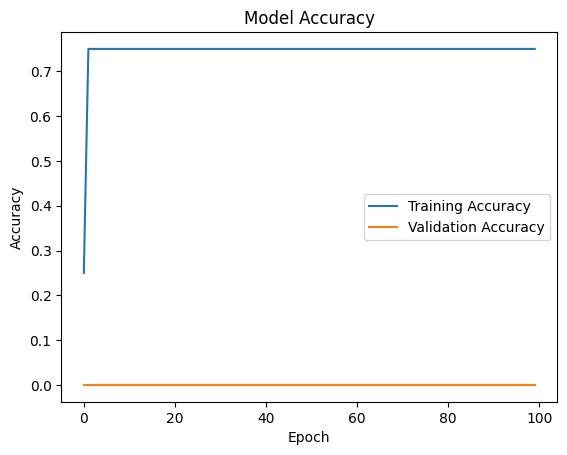

In [54]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
